In [81]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
from bs4 import BeautifulSoup as bs
import os
import requests
from sqlalchemy import *
from sqlalchemy import create_engine
import calendar
import sqlite3 as sql
pd.options.display.float_format = '{:,.4f}'.format
from scipy.stats import norm as norm
from pandas_datareader.data import Options
import py_vollib.black.greeks.analytical as py_greeks
from scipy.stats import norm as norm

import praw

main_dir = os.getcwd()
module_dir = 'C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\SEC'
db_dir = r'C:\Users\Fang\Desktop\Python Trading\Trading\Data\DBs'


from yahoofinancials import YahooFinancials

In [82]:
os.chdir(db_dir)

sec_engine = create_engine('sqlite:///SEC_F4.db', echo=False)

f4_query = """
SELECT   InsiderTxns.*,
         txnAmount*txnPrice AS txnDollarAmount
FROM     InsiderTxns
"""

f4s = pd.read_sql(f4_query,
                  sec_engine,
                  parse_dates = ['txnDate'])
#f4s['txnMonth'] = f4s.txnDate.dt.strftime('%Y-%m')

In [80]:
f4s_amounts = f4s.groupby(['txnMonth',
                           'ticker',
                           'industry',
                           'txnCode']).agg({'txnAmount':'sum',
                                            'txnDollarAmount':'sum'}).reset_index()

f4s_amounts = f4s_amounts[f4s_amounts.txnCode.isin(f4s[['txnCode','txnDesc']].drop_duplicates().dropna().txnCode)]

f4s_amounts = f4s_amounts[f4s_amounts.txnMonth > '2019-12'].pivot_table(values = ['txnAmount','txnDollarAmount'], 
                                                                        index = ['ticker','industry'], 
                                                                        columns = 'txnCode', 
                                                                        aggfunc='mean')
f4s_amounts.reset_index()
# f4s_amounts[f4s_amounts.txnCode == 'P'].sort_values('txnAmount', ascending = False)

# f4s[f4s.ticker.isin(f4s_amounts[f4s_amounts.txnCode == 'P'].sort_values('txnAmount', ascending = False).head().ticker)].sort_values(['txnDate','ticker'],
#                                                                                                                                     ascending = [False, True])



ticker                                           industry  \
txnCode                                                                  
0            (NLNK)                        PHARMACEUTICAL PREPARATIONS   
1        (NYSE:FBC)           SAVINGS INSTITUTION, FEDERALLY CHARTERED   
2            (SIRI)                        RADIO BROADCASTING STATIONS   
3           1314152                      REAL ESTATE INVESTMENT TRUSTS   
4                 A                  LABORATORY ANALYTICAL INSTRUMENTS   
5               AAL                      AIR TRANSPORTATION, SCHEDULED   
6              AAOI                   SEMICONDUCTORS & RELATED DEVICES   
7               AAP                   RETAIL-AUTO & HOME SUPPLY STORES   
8              AAPL                               ELECTRONIC COMPUTERS   
9              AAWW                   AIR TRANSPORTATION, NONSCHEDULED   
10             AAXN  ORDNANCE & ACCESSORIES, (NO VEHICLES/GUIDED MI...   
11             ABBV                        PHARMACEUTICAL PREPARATIONS   
12              ABC  WHOLESALE-DRUGS PROPRIETARIES & DRUGGISTS' SUN...   
13             ABCB                             STATE COMMERCIAL BANKS   
14             ABDC                                             200131   
15              ABG            RETAIL-AUTO DEALERS & GASOLINE STATIONS   
16              ABM            SERVICES-TO DWELLINGS & OTHER BUILDINGS   
17             ABMD         SURGICAL & MEDICAL INSTRUMENTS & APPARATUS   
18              ABR                      REAL ESTATE INVESTMENT TRUSTS   
19              ABT                        PHARMACEUTICAL PREPARATIONS   
20               AC    SECURITY BROKERS, DEALERS & FLOTATION COMPANIES   
21             ACAD                        PHARMACEUTICAL PREPARATIONS   
22             ACCR      TELEPHONE COMMUNICATIONS (NO RADIO TELEPHONE)   
23             ACER                        PHARMACEUTICAL PREPARATIONS   
24             ACFN                      SERVICES-ENGINEERING SERVICES   
25             ACGL                  FIRE, MARINE & CASUALTY INSURANCE   
26             ACHN                        PHARMACEUTICAL PREPARATIONS   
27             ACLS                    SPECIAL INDUSTRY MACHINERY, NEC   
28              ACM                      SERVICES-ENGINEERING SERVICES   
29              ACN                    SERVICES-BUSINESS SERVICES, NEC   
...             ...                                                ...   
2380              Y                  FIRE, MARINE & CASUALTY INSURANCE   
2381           YORW                                       WATER SUPPLY   
2382           YTEN                     MISCELLANEOUS PLASTIC PRODUCTS   
2383            YUM                               RETAIL-EATING PLACES   
2384       Z AND ZG                    SERVICES-BUSINESS SERVICES, NEC   
2385            ZBH  ORTHOPEDIC, PROSTHETIC & SURGICAL APPLIANCES &...   
2386           ZBRA           GENERAL INDUSTRIAL MACHINERY & EQUIPMENT   
2387           ZBRA                    TELEPHONE & TELEGRAPH APPARATUS   
2388           ZCOR                        PHARMACEUTICAL PREPARATIONS   
2389           ZDGE                      SERVICES-PREPACKAGED SOFTWARE   
2390           ZEUS         WHOLESALE-METALS SERVICE CENTERS & OFFICES   
2391           ZGNX                        PHARMACEUTICAL PREPARATIONS   
2392           ZION                          NATIONAL COMMERCIAL BANKS   
2393           ZIOP                        PHARMACEUTICAL PREPARATIONS   
2394           ZIVO                            FOOD & KINDRED PRODUCTS   
2395           ZIXI    SERVICES-COMPUTER PROCESSING & DATA PREPARATION   
2396             ZN             OIL AND GAS FIELD EXPLORATION SERVICES   
2397           ZNGA    SERVICES-COMPUTER PROCESSING & DATA PREPARATION   
2398            ZOM                        PHARMACEUTICAL PREPARATIONS   
2399            ZTS                        PHARMACEUTICAL PREPARATIONS   
2400           ZYME                        PHARMACEUTICAL PREPARATIONS   
2401            a

In [83]:
f4s

,idx,cik,ticker,industry,txnDate,txnCode,txnAmount,txnPrice,insiderName,isDirector,isOfficer,tenPctOwner,officerTitle,txnAcqDispCode,postTxnSharesOwned,txnDesc,txnDollarAmount
0,0,0001000045,NICK,SHORT-TERM BUSINESS CREDIT INSTITUTIONS,2020-02-10,P,320.0000,8.2600,Royal Jeffrey C,1,0,0,,A,"14,085.0000",Purchase on exchange or from person,"2,643.2000"
1,1,0001000045,NICK,SHORT-TERM BUSINESS CREDIT INSTITUTIONS,2020-02-28,P,"1,153.0000",8.0400,Royal Jeffrey C,1,0,0,,A,"15,238.0000",Purchase on exchange or from person,"9,270.1200"
2,2,0001000045,NICK,SHORT-TERM BUSINESS CREDIT INSTITUTIONS,2020-02-28,P,"33,880.0000",8.1000,Peterson Adam K,1,0,1,,A,"1,992,207.0000",Purchase on exchange or from person,"274,428.0000"
3,3,0001000045,NICK,SHORT-TERM BUSINESS CREDIT INSTITUTIONS,2020-03-05,P,"9,838.0000",8.9000,Peterson Adam K,1,0,1,,A,"2,036,681.0000",Purchase on exchange or from person,"87,558.2000"
4,4,0001000209,MFIN,FINANCE SERVICES,2020-02-17,A,"66,766.0000",0.0000,MURSTEIN ANDREW,1,1,0,President,A,"446,532.0000",Grant from company,0.0000
5,5,0001000209,MFIN,FINANCE SERVICES,2020-02-17,A,"18,336.0000",0.0000,MURSTEIN ALVIN,1,1,0,Chairman & CEO,A,"184,764.0000",Grant from company,0.0000
6,6,0001000209,MFIN,FINANCE SERVICES,2020-02-17,A,"3,991.0000",0.0000,Munson Thomas J.,0,1,0,See Remarks,A,"19,113.0000",Grant from company,0.0000
7,7,0001000209,MFIN,FINANCE SERVICES,2020-02-17,A,"4,678.0000",0.0000,Travis Alexander S,0,1,0,See Remarks,A,"8,495.0000",Grant from company,0.0000
8,8,0001000209,MFIN,FINANCE SERVICES,2020-02-17,A,"16,841.0000",0.0000,Poulton Donald S.,0,1,0,See Remarks,A,"93,372.0000",Grant from company,0.0000
9,9,0001000209,MFIN,FINANCE SERVICES,2020-02-17,A,"5,239.0000",0.0000,Silverman Marisa T.,0,1,0,See Remarks,A,"19,640.0000",Grant from company,0.0000


In [9]:
# Commodities DJP COMT
dragon_weights = {'equity': 0.24,
                  'fi': 0.18,
                  'gold': 0.19,
                  'comdty': 0.18,
                  'longvol': 0.21}
dragon_names = {'equity': 'SPY',
                'fi': 'GOVT',
                'gold': 'GLD',
                'comdty': 'DJP',
                'longvol': 'TAIL'}


In [10]:
dragon_port = YahooFinancials(list(dragon_names.values()))

dragon_port_prices = dragon_port.get_historical_price_data('2001-01-01', '2020-02-13', 'daily')

In [31]:
dp_prices = pd.concat([pd.DataFrame(dragon_port_prices[tick]['prices'])[['formatted_date','adjclose']].set_index('formatted_date').rename(columns = {'adjclose': tick}) for tick in dragon_port_prices.keys()],
                      axis = 1)
dp_prices.index = pd.to_datetime(dp_prices.index)

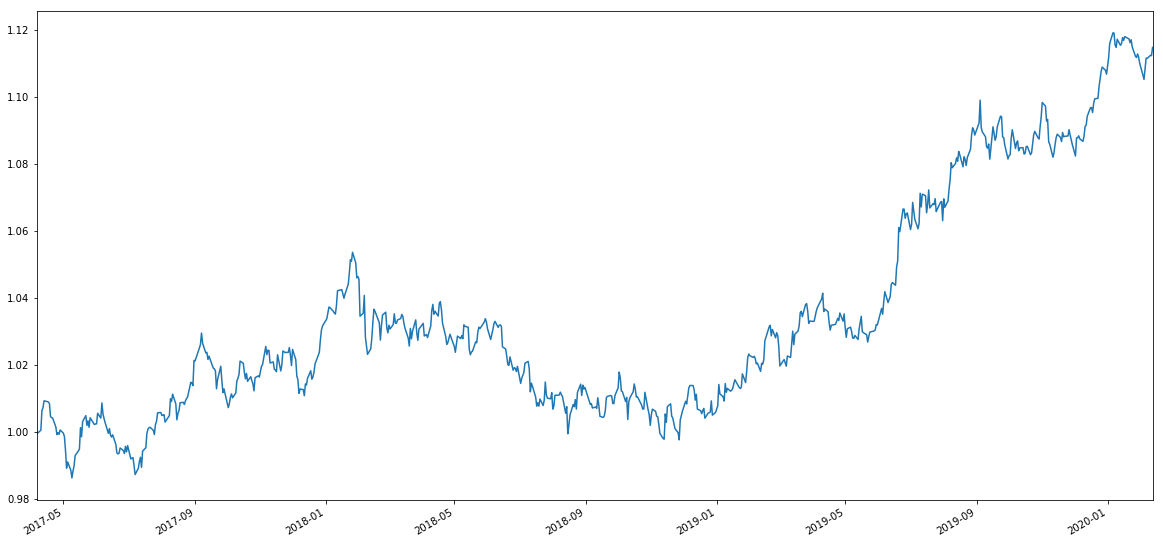

In [58]:
((dp_prices.dropna().pct_change()*np.array(list(dragon_weights.values()))).sum(axis = 1) + 1).cumprod().plot(figsize = (20,10))